In [76]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [77]:
Y= np.loadtxt('Y.txt')

In [78]:
# Here is the data of wavelength of mangroves data, but I don't know why I can't upload the to this file, but I can upload it on my
# own jutper notebook, so I woulad also sent the data to you, but if you want to run the code, I thik you should change the code below.

In [79]:
Wavelength= pd.read_csv('mangroves color.csv')

In [80]:
# in the first plot, can find noisy data in range (1800,2000), here are two thoughts to solve this, one is use LLE to reduce dimension 
# to the other is to remove data here.

In [81]:
Mean=np.mean(Wavelength,axis=0)
Sigma=np.std(Wavelength,axis=0)
T=Sigma/Mean

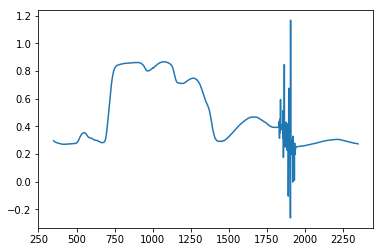

In [82]:
plt.plot(Y[0:2000],Mean[0:2000])

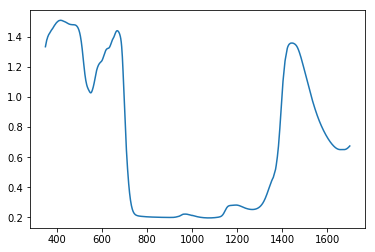

In [83]:
plt.plot(Y[0:1350],T[0:1350])

In [84]:
# As required, I try teo wavelength range here,(400,900), (400,2400)

In [85]:
Y[50],Y[550],Y[2050]

(400.0, 900.0, 2400.0)

In [86]:
x=Wavelength.T
wavelength2=x[50:2050].T
wavelength2.shape

(1104, 2000)

In [87]:
x=Wavelength.T
wavelength1=x[50:550].T
wavelength1.shape

(1104, 500)

In [88]:
# I try different methods to reduce the dimension here.
# There are some unlabeled data, and I want to mark them at last. 
# In my idea, I should reduce the dimension and then find the good classifier using the labeled data, and fit this best method to 
# unlabeled.
# So I should reduce the dimension for all the samples,not just the labeled data.
# I try some dimensions I should use and I showed their plots in some meetings. In this code I removed them, this is the next step 
# in my work.
# but these dimensions are ok and I have roughly compared them.

In [89]:
# these two are linear method.

In [90]:
pca=PCA(n_components=10)
X_PCA1=pca.fit_transform(wavelength1)
X_PCA2=pca.fit_transform(wavelength2)

In [91]:
ICA = FastICA(n_components=15,random_state=100) 
X_ICA1=ICA.fit_transform(wavelength1)
X_ICA2=ICA.fit_transform(wavelength2)

In [92]:
# This is nonlinear method

In [93]:
lle=LocallyLinearEmbedding(n_components=30,n_neighbors=50)
X_lle1=lle.fit_transform(wavelength1)
X_lle2=lle.fit_transform(wavelength2)

In [94]:
# new data, choose the labeled ones.

In [95]:
X_Pca1_labeled=X_PCA1[0:841]
X_Ica1_labeled=X_ICA1[0:841]
X_Lle1_labeled=X_lle1[0:841]
x_n1=wavelength1[0:841]

In [96]:
X_Pca2_labeled=X_PCA2[0:841]
X_Ica2_labeled=X_ICA2[0:841]
X_Lle2_labeled=X_lle2[0:841]
x_n2=wavelength2[0:841]

In [97]:
# target for four class(cloor).

In [98]:
from numpy import array

In [99]:
Target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M",
               "M","M","M","M","M","M","M","M","M","M","M" ])

In [100]:
# target for three class, the mud class have many noisy data, but after comparing, this data won't affect the classification effect
# since the characteristic of these data is out standing, so I give up this idea.

In [101]:
target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B"])

In [102]:
# split train data,and test data at random

In [103]:
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_Pca1_labeled,Target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_Ica1_labeled,Target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_Lle1_labeled,Target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(x_n1,Target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_Pca2_labeled,Target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_Ica2_labeled,Target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_Lle2_labeled,Target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_n2,Target, test_size=0.3)

In [104]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV

In [105]:
from sklearn.ensemble import BaggingClassifier

In [106]:
# SVM model for two range (400,900) , (400,2400)

In [107]:
SVM= SVC(kernel='rbf')

In [108]:
# when choose kernel, I find linear and sigmod is bad, so I choose rbf, which is often used.
# for gussian kernel (rbf), there are C and gamma to choose
# I first limit their range, then find the good combination roughly.

In [109]:
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))

In [110]:
clf = RandomizedSearchCV(SVM, distributions, random_state=42)

In [111]:
search1 = clf.fit(xlle1_train, ylle1_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [112]:
search1.best_params_ 

{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [113]:
# Then is the effects of SVM ,this model is good and I want to explain the method and how to use this.

In [114]:
clf1= SVC(C=7,kernel='rbf',gamma=1)

In [115]:
clf1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf1.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, clf1.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, clf1.predict(xpca1_test)))

accuracy_train： 0.9302721088435374
accuracy_test： 0.8735177865612648
Kappa_train： 0.8983895236850867
Kappa_test： 0.815189353299701
confusion_matrix_train：
[[222   0   7   3]
 [  0  29   0   0]
 [  6   0 156   9]
 [  7   0   9 140]]
confusion_matrix_test：
[[91  0  5  2]
 [ 0 11  1  0]
 [ 7  0 63  9]
 [ 5  0  3 56]]


In [116]:
Clf1= SVC(C=7,kernel='rbf',gamma=1)

In [117]:
Clf1.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, Clf1.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, Clf1.predict(xpca2_test)))

accuracy_train： 0.7074829931972789
accuracy_test： 0.6442687747035574
Kappa_train： 0.5663902727639104
Kappa_test： 0.46960167714884704
confusion_matrix_train：
[[187   0  19  24]
 [  0  28   0   0]
 [ 50   0 112   6]
 [ 59   0  14  89]]
confusion_matrix_test：
[[73  0 12 15]
 [ 0 13  0  0]
 [30  0 50  2]
 [24  0  7 27]]


In [118]:
clf3= SVC(C=6,kernel='rbf',gamma=1)
Clf3= SVC(C=6,kernel='rbf',gamma=1)

In [119]:
clf3.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf3.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf3.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf3.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf3.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, clf3.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, clf3.predict(xIca1_test)))

accuracy_train： 0.9404761904761905
accuracy_test： 0.9367588932806324
Kappa_train： 0.9127241268171872
Kappa_test： 0.9078953356086462
confusion_matrix_train：
[[217   0   6   0]
 [  1  22   0   0]
 [  3   0 178  10]
 [  3   0  12 136]]
confusion_matrix_test：
[[105   0   2   0]
 [  0  18   0   0]
 [  4   0  55   0]
 [  1   0   9  59]]


In [120]:
Clf3.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, Clf3.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, Clf3.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, Clf3.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, Clf3.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, Clf3.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, Clf3.predict(xIca2_test)))

accuracy_train： 0.4387755102040816
accuracy_test： 0.4268774703557312
Kappa_train： 0.08932191935120515
Kappa_test： 0.0992904318790051
confusion_matrix_train：
[[234   0   0   0]
 [  5  24   0   0]
 [174   0   0   0]
 [151   0   0   0]]
confusion_matrix_test：
[[96  0  0  0]
 [ 0 12  0  0]
 [76  0  0  0]
 [69  0  0  0]]


In [121]:
clf4= SVC(C=3.5,kernel='rbf',gamma=9)
Clf4= SVC(C=3.5,kernel='rbf',gamma=9)

In [122]:
clf4.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf4.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf4.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf4.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf4.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, clf4.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, clf4.predict(xlle1_test)))

accuracy_train： 0.9285714285714286
accuracy_test： 0.8853754940711462
Kappa_train： 0.895475515300292
Kappa_test： 0.8339632035121862
confusion_matrix_train：
[[217   0   6   4]
 [  0  25   0   0]
 [  8   0 167  10]
 [  9   0   5 137]]
confusion_matrix_test：
[[94  0  6  3]
 [ 0 15  1  0]
 [ 3  0 56  6]
 [ 4  0  6 59]]


In [123]:
Clf4.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, Clf4.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, Clf4.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, Clf4.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, Clf4.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, Clf4.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, Clf4.predict(xlle2_test)))

accuracy_train： 0.9795918367346939
accuracy_test： 0.9723320158102767
Kappa_train： 0.9703454652433386
Kappa_test： 0.9593909793400748
confusion_matrix_train：
[[221   0   4   0]
 [  1  28   0   0]
 [  2   0 176   2]
 [  2   0   1 151]]
confusion_matrix_test：
[[102   0   3   0]
 [  0  12   0   0]
 [  0   0  69   1]
 [  2   0   1  63]]


In [124]:
clf= SVC(C=1,kernel='rbf',gamma=1)
Clf= SVC(C=1,kernel='rbf',gamma=0.2)

In [125]:
bagging = BaggingClassifier(Clf,max_samples=0.6, max_features=0.6)
bagging.fit(x2_train,y2_train)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=0.6,
         max_samples=0.6, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [126]:
clf.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, clf.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, clf.predict(x1_test)))

accuracy_train： 0.8384353741496599
accuracy_test： 0.7984189723320159
Kappa_train： 0.7657635746843511
Kappa_test： 0.7015336217066457
confusion_matrix_train：
[[197   0  12  19]
 [  0  32   0   0]
 [  7   0 148  16]
 [ 29   0  12 116]]
confusion_matrix_test：
[[87  0  1 14]
 [ 0  9  0  0]
 [ 6  0 64  9]
 [14  0  7 42]]


In [127]:
bagging.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, bagging.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, bagging.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, bagging.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, bagging.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, bagging.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, bagging.predict(x2_test)))

accuracy_train： 0.9370748299319728
accuracy_test： 0.9367588932806324
Kappa_train： 0.9074673460447351
Kappa_test： 0.9092661496391268
confusion_matrix_train：
[[227   0  11   0]
 [  0  25   0   0]
 [ 12   1 159   1]
 [  5   1   6 140]]
confusion_matrix_test：
[[89  0  3  0]
 [ 0 16  0  0]
 [ 6  0 71  0]
 [ 5  1  1 61]]


In [128]:
Clf.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, Clf.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, Clf.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, Clf.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, Clf.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, Clf.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, Clf.predict(x2_test)))

accuracy_train： 0.9710884353741497
accuracy_test： 0.9683794466403162
Kappa_train： 0.9574974700875052
Kappa_test： 0.9546747284738551
confusion_matrix_train：
[[232   0   6   0]
 [  0  25   0   0]
 [  5   0 168   0]
 [  3   0   3 146]]
confusion_matrix_test：
[[90  0  2  0]
 [ 0 16  0  0]
 [ 0  0 76  1]
 [ 5  0  0 63]]


In [129]:
# Random Forest effect, too avoid overfitting, I choose set the max depth.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [132]:
randomforest = RandomForestClassifier(max_depth=8)

In [133]:
randomforest.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, randomforest.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, randomforest.predict(xpca1_test)))

accuracy_train： 0.9931972789115646
accuracy_test： 0.8932806324110671
Kappa_train： 0.990094381341049
Kappa_test： 0.843770011892782
confusion_matrix_train：
[[232   0   0   0]
 [  0  29   0   0]
 [  0   0 169   2]
 [  1   0   1 154]]
confusion_matrix_test：
[[93  0  3  2]
 [ 0 11  0  1]
 [ 8  0 66  5]
 [ 4  0  4 56]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
randomforest.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, randomforest.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, randomforest.predict(xpca2_test)))

accuracy_train： 0.9115646258503401
accuracy_test： 0.6600790513833992
Kappa_train： 0.8706522382882235
Kappa_test： 0.49895221646516996
confusion_matrix_train：
[[219   0   7   4]
 [  0  28   0   0]
 [ 16   0 149   3]
 [ 13   0   9 140]]
confusion_matrix_test：
[[70  0 12 18]
 [ 0 12  1  0]
 [21  0 55  6]
 [18  0 10 30]]


In [135]:
randomforest.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, randomforest.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, randomforest.predict(xIca1_test)))

accuracy_train： 0.9931972789115646
accuracy_test： 0.9090909090909091
Kappa_train： 0.9900320398718405
Kappa_test： 0.86764170685106
confusion_matrix_train：
[[223   0   0   0]
 [  0  22   0   1]
 [  0   0 191   0]
 [  0   0   3 148]]
confusion_matrix_test：
[[103   0   3   1]
 [  2  16   0   0]
 [  2   0  55   2]
 [  1   0  12  56]]


In [136]:
randomforest.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, randomforest.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, randomforest.predict(xIca2_test)))

accuracy_train： 0.8894557823129252
accuracy_test： 0.6324110671936759
Kappa_train： 0.837568370456313
Kappa_test： 0.4573194639850543
confusion_matrix_train：
[[218   0   7   9]
 [  0  29   0   0]
 [ 15   0 155   4]
 [ 24   0   6 121]]
confusion_matrix_test：
[[68  0 14 14]
 [ 0 10  2  0]
 [16  0 54  6]
 [36  0  5 28]]


In [137]:
randomforest.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, randomforest.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, randomforest.predict(xlle1_test)))

accuracy_train： 0.9727891156462585
accuracy_test： 0.8260869565217391
Kappa_train： 0.9601666497307184
Kappa_test： 0.7467640301189745
confusion_matrix_train：
[[222   0   2   3]
 [  0  25   0   0]
 [  3   0 182   0]
 [  7   0   1 143]]
confusion_matrix_test：
[[91  0  7  5]
 [ 1 15  0  0]
 [ 6  0 54  5]
 [10  0 10 49]]


In [138]:
randomforest.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, randomforest.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, randomforest.predict(xlle2_test)))

accuracy_train： 0.9880952380952381
accuracy_test： 0.9169960474308301
Kappa_train： 0.9827116209325476
Kappa_test： 0.8782259912903965
confusion_matrix_train：
[[224   0   1   0]
 [  0  29   0   0]
 [  4   0 174   2]
 [  0   0   0 154]]
confusion_matrix_test：
[[96  0  9  0]
 [ 0 12  0  0]
 [ 2  0 66  2]
 [ 5  0  3 58]]


In [139]:
randomforest.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, randomforest.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, randomforest.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, randomforest.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, randomforest.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, randomforest.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, randomforest.predict(x1_test)))

accuracy_train： 0.9251700680272109
accuracy_test： 0.7430830039525692
Kappa_train： 0.8918914401521008
Kappa_test： 0.6182683379758589
confusion_matrix_train：
[[210   0   2  16]
 [  0  31   0   1]
 [  3   0 156  12]
 [  9   0   1 147]]
confusion_matrix_test：
[[81  0  7 14]
 [ 0  9  0  0]
 [10  0 62  7]
 [17  0 10 36]]


In [140]:
randomforest.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, randomforest.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, randomforest.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, randomforest.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, randomforest.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, randomforest.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, randomforest.predict(x2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.9130434782608695
Kappa_train： 0.9925014984250596
Kappa_test： 0.8749831543955797
confusion_matrix_train：
[[238   0   0   0]
 [  0  25   0   0]
 [  3   0 170   0]
 [  0   0   0 152]]
confusion_matrix_test：
[[87  0  4  1]
 [ 0 15  0  1]
 [10  0 66  1]
 [ 4  0  1 63]]


In [141]:
# this decision tree model, I am sure it is bad than Random forest and GBDT, so no need to consider much.

In [142]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=8)

In [143]:
clf_tree.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf_tree.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf_tree.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf_tree.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf_tree.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, clf_tree.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, clf_tree.predict(x1_test)))

accuracy_train： 0.8877551020408163
accuracy_test： 0.6877470355731226
Kappa_train： 0.8376084827892107
Kappa_test： 0.5394912676835169
confusion_matrix_train：
[[202   0  13  13]
 [  0  32   0   0]
 [  2   0 164   5]
 [ 18   0  15 124]]
confusion_matrix_test：
[[69  0 13 20]
 [ 0  9  0  0]
 [ 8  0 65  6]
 [17  0 15 31]]


In [144]:
clf_tree.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, clf_tree.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, clf_tree.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, clf_tree.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, clf_tree.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, clf_tree.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, clf_tree.predict(x2_test)))

accuracy_train： 1.0
accuracy_test： 0.8458498023715415
Kappa_train： 1.0
Kappa_test： 0.779616724738676
confusion_matrix_train：
[[238   0   0   0]
 [  0  25   0   0]
 [  0   0 173   0]
 [  0   0   0 152]]
confusion_matrix_test：
[[75  0 13  4]
 [ 1 15  0  0]
 [ 8  0 65  4]
 [ 5  1  3 59]]


In [145]:
clf_tree.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, clf_tree.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, clf_tree.predict(xpca1_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.8695652173913043
Kappa_train： 0.992568407305205
Kappa_test： 0.8088380080137378
confusion_matrix_train：
[[232   0   0   0]
 [  0  29   0   0]
 [  0   0 170   1]
 [  2   0   0 154]]
confusion_matrix_test：
[[93  0  2  3]
 [ 0 11  0  1]
 [ 7  0 65  7]
 [ 6  0  7 51]]


In [146]:
clf_tree.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, clf_tree.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, clf_tree.predict(xpca2_test)))

accuracy_train： 0.8673469387755102
accuracy_test： 0.6126482213438735
Kappa_train： 0.8055720414426941
Kappa_test： 0.43080808080808075
confusion_matrix_train：
[[211   0  11   8]
 [  0  28   0   0]
 [ 20   0 145   3]
 [ 24   0  12 126]]
confusion_matrix_test：
[[61  0 12 27]
 [ 0 11  2  0]
 [24  0 55  3]
 [18  0 12 28]]


In [147]:
clf_tree.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, clf_tree.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, clf_tree.predict(xIca1_test)))

accuracy_train： 0.9625850340136054
accuracy_test： 0.8300395256916996
Kappa_train： 0.9451799366026478
Kappa_test： 0.7530026109660575
confusion_matrix_train：
[[217   0   5   1]
 [  0  22   1   0]
 [  2   0 185   4]
 [  1   0   8 142]]
confusion_matrix_test：
[[95  0 10  2]
 [ 1 17  0  0]
 [ 6  0 49  4]
 [ 6  0 14 49]]


In [148]:
clf_tree.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, clf_tree.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, clf_tree.predict(xIca2_test)))

accuracy_train： 0.8044217687074829
accuracy_test： 0.616600790513834
Kappa_train： 0.7076056264945105
Kappa_test： 0.4333902844477281
confusion_matrix_train：
[[222   0   9   3]
 [  0  29   0   0]
 [ 35   0 131   8]
 [ 55   0   5  91]]
confusion_matrix_test：
[[74  0 11 11]
 [ 0 10  1  1]
 [17  0 47 12]
 [38  2  4 25]]


In [149]:
clf_tree.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, clf_tree.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, clf_tree.predict(xlle1_test)))

accuracy_train： 0.9642857142857143
accuracy_test： 0.7984189723320159
Kappa_train： 0.9476349202310373
Kappa_test： 0.7066900047737037
confusion_matrix_train：
[[225   0   0   2]
 [  0  25   0   0]
 [  8   0 175   2]
 [  8   0   1 142]]
confusion_matrix_test：
[[91  0  8  4]
 [ 1 15  0  0]
 [ 5  0 45 15]
 [ 9  0  9 51]]


In [150]:
clf_tree.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, clf_tree.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, clf_tree.predict(xlle2_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.8656126482213439
Kappa_train： 0.9950627235628999
Kappa_test： 0.8034592272716887
confusion_matrix_train：
[[224   0   0   1]
 [  0  29   0   0]
 [  1   0 179   0]
 [  0   0   0 154]]
confusion_matrix_test：
[[90  0 11  4]
 [ 0 10  2  0]
 [ 3  1 62  4]
 [ 5  0  4 57]]


In [151]:
# GBDT model, booting+decision, a method I want to explain, and compare it with Randomforest.
# I find roughly good parameter, limit max_depth to avoid overfitting (but for train data easy to reach accuracy is 1).
# I perfer to show how to fulfil GBDT since it is a little better than Random Forest(other articles and my work both find this)

In [152]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier(max_depth=1)
GradientBoosting1 = GradientBoostingClassifier(max_depth=2)
GradientBoosting2 = GradientBoostingClassifier(random_state=10,max_depth=3,min_samples_split=20,min_samples_leaf=8)

In [153]:
GradientBoosting1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, GradientBoosting1.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, GradientBoosting1.predict(x1_test)))

accuracy_train： 0.9795918367346939
accuracy_test： 0.8300395256916996
Kappa_train： 0.9703963515684983
Kappa_test： 0.7465933707577275
confusion_matrix_train：
[[227   0   1   0]
 [  0  32   0   0]
 [  4   0 167   0]
 [  4   0   3 150]]
confusion_matrix_test：
[[89  0  5  8]
 [ 0  9  0  0]
 [ 7  0 70  2]
 [15  0  6 42]]


In [154]:
GradientBoosting.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, GradientBoosting.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, GradientBoosting.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, GradientBoosting.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, GradientBoosting.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, GradientBoosting.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, GradientBoosting.predict(x2_test)))

accuracy_train： 0.9591836734693877
accuracy_test： 0.9051383399209486
Kappa_train： 0.9400344190196953
Kappa_test： 0.8637923686040513
confusion_matrix_train：
[[229   0   9   0]
 [  0  25   0   0]
 [  9   0 162   2]
 [  1   0   3 148]]
confusion_matrix_test：
[[85  0  4  3]
 [ 0 15  1  0]
 [12  0 64  1]
 [ 2  0  1 65]]


In [155]:
GradientBoosting.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, GradientBoosting.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, GradientBoosting.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, GradientBoosting.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, GradientBoosting.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, GradientBoosting.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, GradientBoosting.predict(xpca1_test)))

accuracy_train： 0.9659863945578231
accuracy_test： 0.8774703557312253
Kappa_train： 0.9504211671261984
Kappa_test： 0.8203125
confusion_matrix_train：
[[228   0   3   1]
 [  0  29   0   0]
 [  5   0 163   3]
 [  3   0   5 148]]
confusion_matrix_test：
[[95  0  1  2]
 [ 1 11  0  0]
 [11  0 61  7]
 [ 2  0  7 55]]


In [156]:
GradientBoosting2.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, GradientBoosting2.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, GradientBoosting2.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, GradientBoosting2.predict(xpca2_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.7193675889328063
Kappa_train： 0.9876158382476833
Kappa_test： 0.5861727371161334
confusion_matrix_train：
[[229   0   1   0]
 [  0  28   0   0]
 [  3   0 165   0]
 [  1   0   0 161]]
confusion_matrix_test：
[[75  0 16  9]
 [ 0 12  1  0]
 [18  0 57  7]
 [17  0  3 38]]


In [157]:
GradientBoosting.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, GradientBoosting.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, GradientBoosting.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, GradientBoosting.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, GradientBoosting.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, GradientBoosting.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, GradientBoosting.predict(xIca1_test)))

accuracy_train： 0.9693877551020408
accuracy_test： 0.924901185770751
Kappa_train： 0.9551563426828235
Kappa_test： 0.8900503202195791
confusion_matrix_train：
[[221   0   1   1]
 [  0  23   0   0]
 [  4   0 183   4]
 [  0   0   8 143]]
confusion_matrix_test：
[[106   0   1   0]
 [  0  18   0   0]
 [  5   0  53   1]
 [  4   0   8  57]]


In [158]:
GradientBoosting2.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, GradientBoosting2.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, GradientBoosting2.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, GradientBoosting2.predict(xIca2_test)))

accuracy_train： 0.9863945578231292
accuracy_test： 0.7391304347826086
Kappa_train： 0.9801395802459754
Kappa_test： 0.6188802410243535
confusion_matrix_train：
[[232   0   0   2]
 [  0  29   0   0]
 [  5   0 169   0]
 [  1   0   0 150]]
confusion_matrix_test：
[[71  0 10 15]
 [ 0  9  1  2]
 [14  0 59  3]
 [16  0  5 48]]


In [159]:
GradientBoosting1.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, GradientBoosting1.predict(xlle1_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.8616600790513834
Kappa_train： 0.9875658712771627
Kappa_test： 0.7995109470871918
confusion_matrix_train：
[[226   0   1   0]
 [  0  25   0   0]
 [  1   0 183   1]
 [  2   0   0 149]]
confusion_matrix_test：
[[91  0  6  6]
 [ 1 15  0  0]
 [ 3  0 58  4]
 [ 7  0  8 54]]


In [160]:
GradientBoosting.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, GradientBoosting.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, GradientBoosting.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, GradientBoosting.predict(xlle2_test)))

accuracy_train： 0.9744897959183674
accuracy_test： 0.924901185770751
Kappa_train： 0.9629221701880796
Kappa_test： 0.8901081315867682
confusion_matrix_train：
[[221   0   4   0]
 [  0  29   0   0]
 [  5   0 174   1]
 [  3   0   2 149]]
confusion_matrix_test：
[[96  0  9  0]
 [ 0 11  1  0]
 [ 2  1 66  1]
 [ 2  0  3 61]]


In [161]:
# next step is to find the best parameters of GBDT.
# But I haven't do this

In [189]:
# I can also use sklearn to duild Netural Network, but it can be difficult to tell the meaning of the net.
# also the best net is difficult to find, I can just try some and find a roughly suitable one.
# I also find for DNN, reduce dimension is a good way to improvE.

In [190]:
from sklearn.neural_network import MLPClassifier

In [209]:
MLP1=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=800,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(40, ))
MLP2=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=500,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(20, ))

In [210]:
MLP1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, MLP1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, MLP1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, MLP1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, MLP1.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, MLP1.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, MLP1.predict(x1_test)))

accuracy_train： 0.9540816326530612
accuracy_test： 0.9367588932806324
Kappa_train： 0.9334590720482836
Kappa_test： 0.906473822836283
confusion_matrix_train：
[[221   0   5   2]
 [  0  32   0   0]
 [ 10   0 158   3]
 [  1   0   6 150]]
confusion_matrix_test：
[[98  0  3  1]
 [ 0  9  0  0]
 [ 3  0 73  3]
 [ 1  0  5 57]]


In [211]:
print (MLP1.score(x1_test,y1_test))
print (MLP1.n_layers_)
print (MLP1.loss_)

0.9367588932806324
3
0.15412122896011804


In [194]:
MLP2.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, MLP2.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, MLP2.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, MLP2.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, MLP2.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, MLP2.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, MLP2.predict(x2_test)))

accuracy_train： 0.9812925170068028
accuracy_test： 0.9723320158102767
Kappa_train： 0.9725307160785346
Kappa_test： 0.9603820858127153
confusion_matrix_train：
[[234   0   4   0]
 [  0  25   0   0]
 [  4   0 167   2]
 [  0   0   1 151]]
confusion_matrix_test：
[[90  0  1  1]
 [ 0 15  1  0]
 [ 2  0 73  2]
 [ 0  0  0 68]]


In [195]:
print (MLP2.score(x2_test,y2_test))
print (MLP2.n_layers_)
print (MLP2.loss_)

0.9723320158102767
3
0.04645593359717582
